In [41]:
from google.colab import files
import pandas as pd
import io

def read_csv_from_upload():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    return df

def read_csv_from_path(filepath):
    df = pd.read_csv(filepath)
    return df

df = read_csv_from_upload() # use a outra função caso queira rodar local

Saving brasileirao.csv to brasileirao (1).csv


In [49]:
# Checando por valores nulos (None, NaNs, etc.) em todas as colunas
df.isnull().sum()

,0
season,0
place,0
team,0
points,0
played,0
won,0
draw,0
loss,0
goals,0
goals_taken,0


In [42]:
# Checando os tipos de dados do dataset
# Vale lembrar: object no pandas e string
df.dtypes

,0
season,int64
place,int64
team,object
points,int64
played,int64
won,int64
draw,int64
loss,int64
goals,int64
goals_taken,int64


In [43]:
# Quantidade de vezes que um time ganhou
df[df['place'] == 1]['team'].value_counts()

,count
team,
Corinthians,4
Palmeiras,4
Cruzeiro,3
Flamengo,3
São Paulo,3
Fluminense,2
Santos,1
Atlético Mineiro,1
Botafogo,1


In [44]:
# Times campeões de cada temporada

df_campeoes = df[df['place'] == 1]
df_campeoes

,season,place,team,points,played,won,draw,loss,goals,goals_taken,goals_diff
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55
24,2004,1,Santos,89,46,27,8,11,103,58,45
48,2005,1,Corinthians,81,42,24,9,9,87,59,28
70,2006,1,São Paulo,78,38,22,12,4,66,32,34
90,2007,1,São Paulo,77,38,23,8,7,55,19,36
110,2008,1,São Paulo,75,38,21,12,5,66,36,30
130,2009,1,Flamengo,67,38,19,10,9,58,44,14
150,2010,1,Fluminense,71,38,20,11,7,62,36,26
170,2011,1,Corinthians,71,38,21,8,9,53,36,17
190,2012,1,Fluminense,77,38,22,11,5,61,33,28


In [45]:
# Média e mediana dos campeões

media_pontos_campeoes = df[df['place'] == 1]['points'].mean()
mediana_pontos_campeoes = df[df['place'] == 1]['points'].median()

print('Média de pontos dos campeões:', media_pontos_campeoes)
print('Mediana de pontos dos campeões:', mediana_pontos_campeoes)

Média de pontos dos campeões: 78.63636363636364
Mediana de pontos dos campeões: 78.5


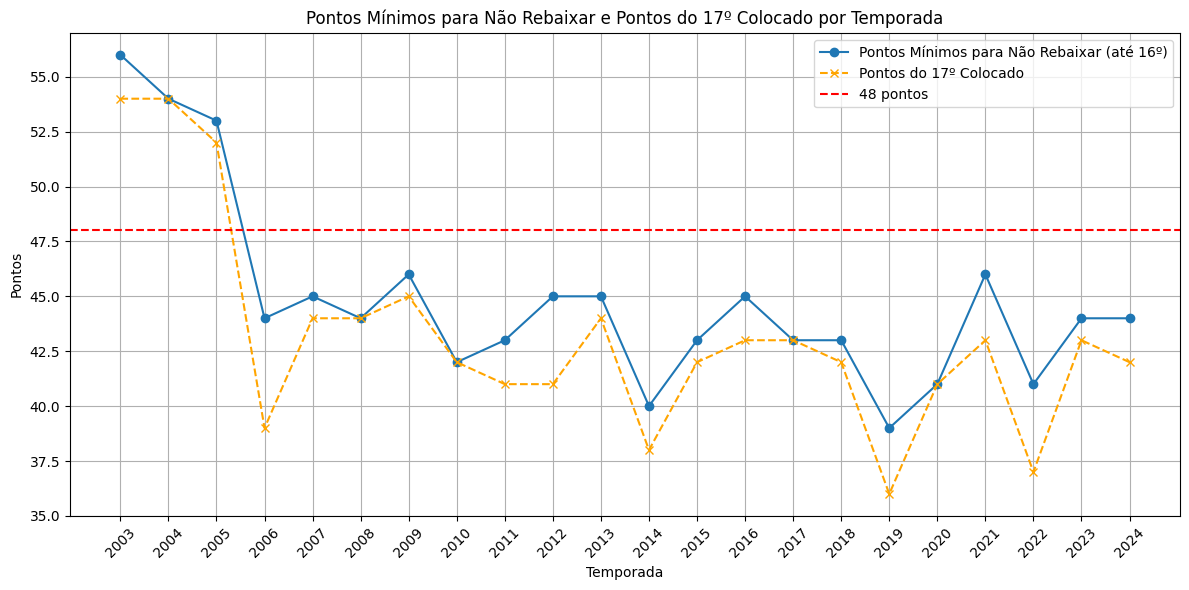

In [46]:
df_filtered = df[df['place'] <= 17]

min_points_avoid_relegation = df[df['place'] <= 16].groupby('season')['points'].min()
points_17th_place = df[df['place'] == 17].groupby('season')['points'].min()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(min_points_avoid_relegation.index, min_points_avoid_relegation.values, marker='o', label='Pontos Mínimos para Não Rebaixar (até 16º)')
plt.plot(points_17th_place.index, points_17th_place.values, marker='x', linestyle='--', color='orange', label='Pontos do 17º Colocado')
plt.axhline(y=48, color='red', linestyle='--', label='48 pontos')
plt.title('Pontos Mínimos para Não Rebaixar e Pontos do 17º Colocado por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Pontos')
plt.grid(True)
plt.xticks(min_points_avoid_relegation.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
def scenarios_for_48_points():
    scenarios = []
    total_matches = 38

    for wins in range(total_matches + 1):
        for draws in range(total_matches - wins + 1):
            losses = total_matches - wins - draws
            points = (wins * 3) + (draws * 1) + (losses * 0)
            if points == 48:
                scenarios.append({'Wins': wins, 'Draws': draws, 'Losses': losses, 'Points': points})

    scenarios.sort(key=lambda x: x['Wins'], reverse=True)
    return scenarios

scenarios_48 = scenarios_for_48_points()
for scenario in scenarios_48:
    print(scenario)

{'Wins': 16, 'Draws': 0, 'Losses': 22, 'Points': 48}
{'Wins': 15, 'Draws': 3, 'Losses': 20, 'Points': 48}
{'Wins': 14, 'Draws': 6, 'Losses': 18, 'Points': 48}
{'Wins': 13, 'Draws': 9, 'Losses': 16, 'Points': 48}
{'Wins': 12, 'Draws': 12, 'Losses': 14, 'Points': 48}
{'Wins': 11, 'Draws': 15, 'Losses': 12, 'Points': 48}
{'Wins': 10, 'Draws': 18, 'Losses': 10, 'Points': 48}
{'Wins': 9, 'Draws': 21, 'Losses': 8, 'Points': 48}
{'Wins': 8, 'Draws': 24, 'Losses': 6, 'Points': 48}
{'Wins': 7, 'Draws': 27, 'Losses': 4, 'Points': 48}
{'Wins': 6, 'Draws': 30, 'Losses': 2, 'Points': 48}
{'Wins': 5, 'Draws': 33, 'Losses': 0, 'Points': 48}


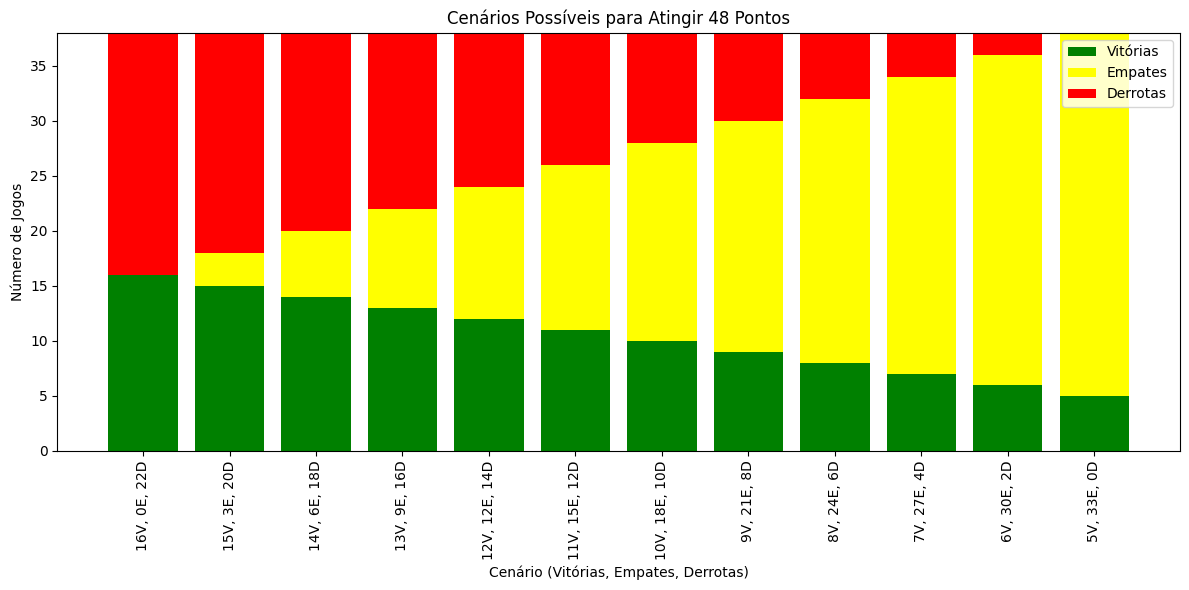

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

df_scenarios = pd.DataFrame(scenarios_48)

plt.figure(figsize=(12, 6))
plt.bar(df_scenarios.index, df_scenarios['Wins'], label='Vitórias', color='green')
plt.bar(df_scenarios.index, df_scenarios['Draws'], bottom=df_scenarios['Wins'], label='Empates', color='yellow')
plt.bar(df_scenarios.index, df_scenarios['Losses'], bottom=df_scenarios['Wins'] + df_scenarios['Draws'], label='Derrotas', color='red')

plt.xticks(df_scenarios.index, [f"{s['Wins']}V, {s['Draws']}E, {s['Losses']}D" for s in scenarios_48], rotation=90)
plt.xlabel('Cenário (Vitórias, Empates, Derrotas)')
plt.ylabel('Número de Jogos')
plt.title('Cenários Possíveis para Atingir 48 Pontos')
plt.legend()
plt.tight_layout()
plt.show()